<a href="https://colab.research.google.com/github/valeria-molino/The-Data-of-well-being/blob/main/The_Data_of_Well_being.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
# 1 -- Libraries --
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import kagglehub
from urllib.request import urlretrieve
from kagglehub import KaggleDatasetAdapter
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import dendrogram, linkage

In [12]:
# 2 -- Load the data --
file_path = "world-data-2023.csv"
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "nelgiriyewithana/countries-of-the-world-2023",
  file_path,
)
print(df.head())
print('Dimensions: ', df.shape)

/tmp/ipython-input-3468534062.py:3: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'countries-of-the-world-2023' dataset.
       Country Density\n(P/Km2) Abbreviation Agricultural Land( %)  \
0  Afghanistan               60           AF                58.10%   
1      Albania              105           AL                43.10%   
2      Algeria               18           DZ                17.40%   
3      Andorra              164           AD                40.00%   
4       Angola               26           AO                47.50%   

  Land Area(Km2) Armed Forces size  Birth Rate  Calling Code  \
0        652,230           323,000       32.49          93.0   
1         28,748             9,000       11.78         355.0   
2      2,381,741           317,000       24.28         213.0   
3            468               NaN        7.20         376.0   
4      1,246,700           117,000       40.73         244.0   

  Capital/Major City Co2-Emissions  ... Out of pocket health expenditure  \
0              Kabul         8,672  

📉 *Economic features*:
- **GDP**: Gross Domestic Product, the total value of goods and services produced in the country.
- **Unemployment Rate**: Percentage of the labor force that is unemployed.

📚 *Education features*:
- **Gross Primary Education Enrollment** (%): Gross enrollment ratio for primary education.
- **Gross Tertiary Education Enrollment** (%): Gross enrollment ratio for tertiary education.

🩺 *Health features*:
- **Life Expectancy**: Average number of years a newborn is expected to live.
- **Infant Mortality**: Number of deaths per 1,000 live births before reaching one year of age.
- **Physicians per Thousand**: Number of physicians per thousand people.

🌳 *Environment features*:
- **CO2 Emissions**: Carbon dioxide emissions in tons.
- **Forested Area** (%): Percentage of land area covered by forests.

👥 *Demographic features*:
- **Density** (P/Km2): Population density measured in persons per square kilometer.
- **Urban Population**: Percentage of the population living in urban areas.

In [13]:
# 3 -- Feature selection --
print('Columns: ', df.columns)

Columns:  Index(['Country', 'Density\n(P/Km2)', 'Abbreviation', 'Agricultural Land( %)',
       'Land Area(Km2)', 'Armed Forces size', 'Birth Rate', 'Calling Code',
       'Capital/Major City', 'Co2-Emissions', 'CPI', 'CPI Change (%)',
       'Currency-Code', 'Fertility Rate', 'Forested Area (%)',
       'Gasoline Price', 'GDP', 'Gross primary education enrollment (%)',
       'Gross tertiary education enrollment (%)', 'Infant mortality',
       'Largest city', 'Life expectancy', 'Maternal mortality ratio',
       'Minimum wage', 'Official language', 'Out of pocket health expenditure',
       'Physicians per thousand', 'Population',
       'Population: Labor force participation (%)', 'Tax revenue (%)',
       'Total tax rate', 'Unemployment rate', 'Urban_population', 'Latitude',
       'Longitude'],
      dtype='object')


In [14]:
cols = [
    'GDP', 'Unemployment rate',
    'Gross primary education enrollment (%)', 'Gross tertiary education enrollment (%)',
    'Life expectancy', 'Infant mortality', 'Physicians per thousand',
    'Co2-Emissions', 'Forested Area (%)',
    'Density\n(P/Km2)', 'Urban_population'
]
df = df[['Country'] + cols]
df.head()

,Country,GDP,Unemployment rate,Gross primary education enrollment (%),Gross tertiary education enrollment (%),Life expectancy,Infant mortality,Physicians per thousand,Co2-Emissions,Forested Area (%),Density\n(P/Km2),Urban_population
0,Afghanistan,"$19,101,353,833",11.12%,104.00%,9.70%,64.5,47.9,0.28,"8,672",2.10%,60,"9,797,273"
1,Albania,"$15,278,077,447",12.33%,107.00%,55.00%,78.5,7.8,1.20,"4,536",28.10%,105,"1,747,593"
2,Algeria,"$169,988,236,398",11.70%,109.90%,51.40%,76.7,20.1,1.72,"150,006",0.80%,18,"31,510,100"
3,Andorra,"$3,154,057,987",NaN,106.40%,NaN,NaN,2.7,3.33,469,34.00%,164,"67,873"
4,Angola,"$94,635,415,870",6.89%,113.50%,9.30%,60.8,51.6,0.21,"34,693",46.30%,26,"21,061,025"


In [15]:
# See missing values and data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 12 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Country                                  195 non-null    object 
 1   GDP                                      193 non-null    object 
 2   Unemployment rate                        176 non-null    object 
 3   Gross primary education enrollment (%)   188 non-null    object 
 4   Gross tertiary education enrollment (%)  183 non-null    object 
 5   Life expectancy                          187 non-null    float64
 6   Infant mortality                         189 non-null    float64
 7   Physicians per thousand                  188 non-null    float64
 8   Co2-Emissions                            188 non-null    object 
 9   Forested Area (%)                        188 non-null    object 
 10  Density
(P/Km2)                          195 non-n

In [16]:
# 4 -- Data cleaning --
def clean_numeric_column(df, col):
    """
    Remove non-numeric characters from a column and convert it to float.
    If the unit is present only in the values, add it to the column name.
    If the unit is already in the name, do not add it again.
    """
    # Choose a non-null value
    sample = df[col].dropna().astype(str).iloc[0]

    # Searching for a unit
    match = re.search(r'[^0-9,.\-\s]', sample)
    unit_in_value = match.group() if match else ''

    # Check in the column name if there is an unit
    unit_in_name = ''
    if re.search(r'\((.*?)\)', col):
        unit_in_name = re.search(r'\((.*?)\)', col).group(1)

    # DEcide if add unit to the column name
    unit_final = unit_in_name or unit_in_value

    # Remove symbol and convert into numeric
    df[col] = (
        df[col]
        .astype(str)
        .str.replace(r'[^0-9.\-]', '', regex=True)
        .replace('', None)
        .astype(float)
    )

    # Rename the column name
    new_col_name = col
    if unit_in_value and not unit_in_name:
        new_col_name = f"{col} ({unit_in_value})"
    elif unit_in_name and unit_in_value == '':
        new_col_name = col

    if new_col_name != col:
        df.rename(columns={col: new_col_name}, inplace=True)

    print(f"✅ Cleaned '{col}' → '{new_col_name}' [unit: {unit_final or 'none'}]")
    return df

In [17]:
cols_to_clean = ['GDP', 'Unemployment rate', 'Gross primary education enrollment (%)', 'Gross tertiary education enrollment (%)', 'Forested Area (%)', 'Co2-Emissions', 'Density\n(P/Km2)', 'Urban_population']
for c in cols_to_clean:
    df = clean_numeric_column(df, c)

✅ Cleaned 'GDP' → 'GDP ($)' [unit: $]
✅ Cleaned 'Unemployment rate' → 'Unemployment rate (%)' [unit: %]
✅ Cleaned 'Gross primary education enrollment (%)' → 'Gross primary education enrollment (%)' [unit: %]
✅ Cleaned 'Gross tertiary education enrollment (%)' → 'Gross tertiary education enrollment (%)' [unit: %]
✅ Cleaned 'Forested Area (%)' → 'Forested Area (%)' [unit: %]
✅ Cleaned 'Co2-Emissions' → 'Co2-Emissions' [unit: none]
✅ Cleaned 'Density
(P/Km2)' → 'Density
(P/Km2)' [unit: P/Km2]
✅ Cleaned 'Urban_population' → 'Urban_population' [unit: none]


In [19]:
# Check for missing values
print(df.isnull().sum())

Country                                     0
GDP ($)                                     2
Unemployment rate (%)                      19
Gross primary education enrollment (%)      7
Gross tertiary education enrollment (%)    12
Life expectancy                             8
Infant mortality                            6
Physicians per thousand                     7
Co2-Emissions                               7
Forested Area (%)                           7
Density\n(P/Km2)                            0
Urban_population                            5
dtype: int64


In [21]:
# How many countries have at least one missing value?
missing_rows = df[df.isnull().any(axis=1)]
missing_countries = missing_rows['Country'].unique()
print('Number of countries with at least one missing value is ', len(missing_countries))
print(missing_countries)

Number of countries with at least one missing value is  23
['Andorra' 'Antigua and Barbuda' 'Bolivia' 'Bosnia and Herzegovina'
 'Dominica' 'Eswatini' 'Grenada' 'Vatican City' 'Kiribati' 'Liechtenstein'
 'Marshall Islands' 'Federated States of Micronesia' 'Monaco' 'Nauru'
 'North Macedonia' 'Palau' 'Palestinian National Authority'
 'Saint Kitts and Nevis' 'San Marino' 'Seychelles' 'Solomon Islands'
 'South Sudan' 'Tuvalu']


In [22]:
# Remove them
df = df.dropna()
print(df.shape)

(172, 12)


In [23]:
# Check for duplicates
print(df.duplicated().sum())

0


In [24]:
# 5 -- Descriptive statistics
print(df.describe())

            GDP ($)  Unemployment rate (%)  \
count  1.720000e+02             172.000000   
mean   5.349048e+11               6.844535   
std    2.295015e+12               5.015474   
min    4.290166e+08               0.090000   
25%    1.356007e+10               3.395000   
50%    4.936440e+10               5.360000   
75%    2.721504e+11               9.207500   
max    2.142770e+13              28.180000   

       Gross primary education enrollment (%)  \
count                              172.000000   
mean                               102.618023   
std                                 13.344384   
min                                 23.400000   
25%                                 99.225000   
50%                                102.450000   
75%                                108.100000   
max                                142.500000   

       Gross tertiary education enrollment (%)  Life expectancy  \
count                               172.000000       172.000000   
mean     

array([[<Axes: title={'center': 'GDP ($)'}>,
        <Axes: title={'center': 'Unemployment rate (%)'}>,
        <Axes: title={'center': 'Gross primary education enrollment (%)'}>],
       [<Axes: title={'center': 'Gross tertiary education enrollment (%)'}>,
        <Axes: title={'center': 'Life expectancy'}>,
        <Axes: title={'center': 'Infant mortality'}>],
       [<Axes: title={'center': 'Physicians per thousand'}>,
        <Axes: title={'center': 'Co2-Emissions'}>,
        <Axes: title={'center': 'Forested Area (%)'}>],
       [<Axes: title={'center': 'Density\n(P/Km2)'}>,
        <Axes: title={'center': 'Urban_population'}>, <Axes: >]],
      dtype=object)

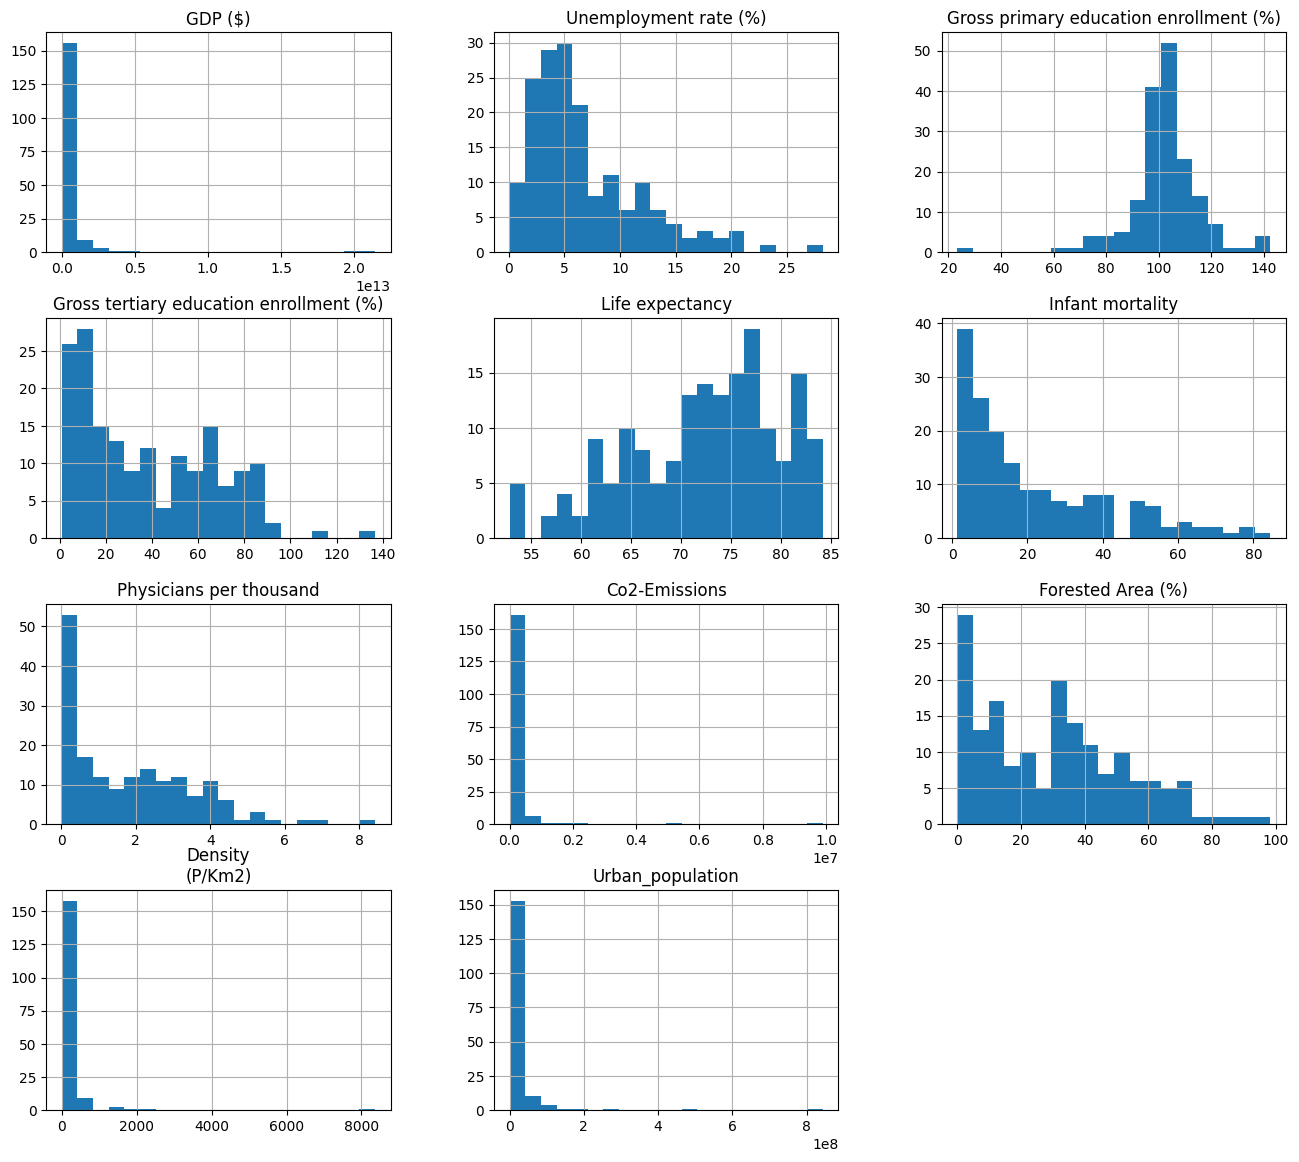

In [32]:
df[['GDP ($)', 'Unemployment rate (%)', 'Gross primary education enrollment (%)',
    'Gross tertiary education enrollment (%)', 'Life expectancy', 'Infant mortality',
    'Physicians per thousand', 'Co2-Emissions', 'Forested Area (%)',
    'Density\n(P/Km2)', 'Urban_population']].hist(bins=20, figsize=(16, 14))

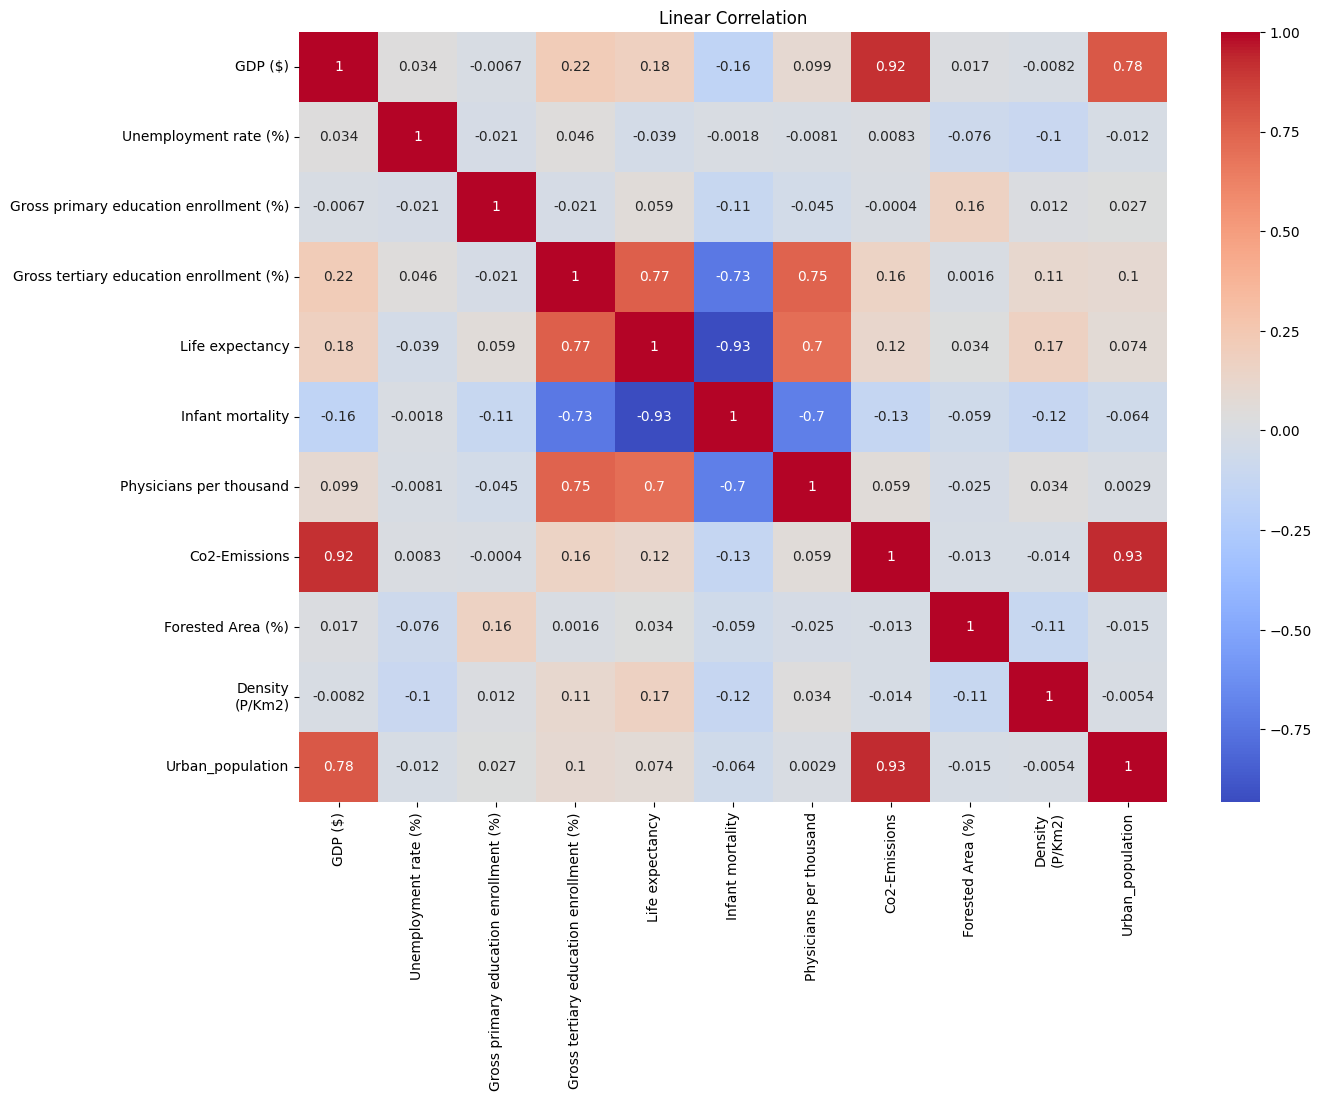

In [27]:
# 6 -- Correlation --
# Linear correlation
corr = df.select_dtypes(include=np.number).corr()
plt.figure(figsize=(14,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Linear Correlation')
plt.show()

Positive correlation:
- Urban population VS GDP = 0.78
- Co2-Emissions VS GDP = 0.92
- Urban population VS Co2-Emissions = 0.93
- Gross tertiary education enrollment VS Life expectancy = 0.77
- Gross tertiary education enrollment VS Physicians per thousand = 0.75
- Life expectancy VS Physicians per thousand = 0.7

Negative correlation:
- Physicians per thousand VS Infant mortality = -0.7
- Infant mortality VS Gross primary education enrollment = -0.73
- Infant mortality VS Gross tertiary education enrollment = -0.93

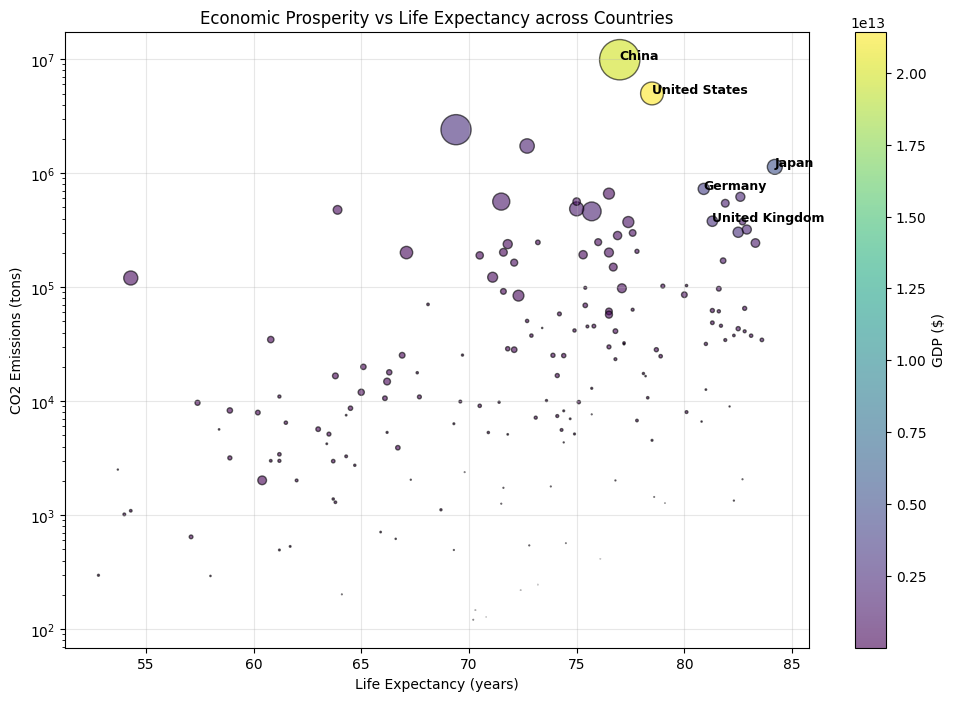

In [58]:
# Multivariate analysis between Urban population, GDP, Co2-Emissions and Life Expectancy
# Select top 5 countries by GDP
top5_gdp = df.nlargest(5, 'GDP ($)')
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    df['Life expectancy'],
    df['Co2-Emissions'],
    s=df['Urban_population'] / 1e6,
    c=df['GDP ($)'],
    cmap='viridis',
    alpha=0.6,
    edgecolor='k'
)
for _, row in top5_gdp.iterrows():
    plt.text(
        row['Life expectancy'],
        row['Co2-Emissions'],
        row['Country'],
        fontsize=9,
        weight='bold',
        color='black'
    )
plt.title('Economic Prosperity vs Life Expectancy across Countries')
plt.xlabel('Life Expectancy (years)')
plt.ylabel('CO2 Emissions (tons)')
plt.colorbar(scatter, label='GDP ($)')
plt.yscale('log')
plt.grid(True, alpha=0.3)
plt.show()

Countries with the highest GDP tend to combine high life expectancy with significantly higher CO₂ emissions, suggesting that economic prosperity often comes at an environmental cost.

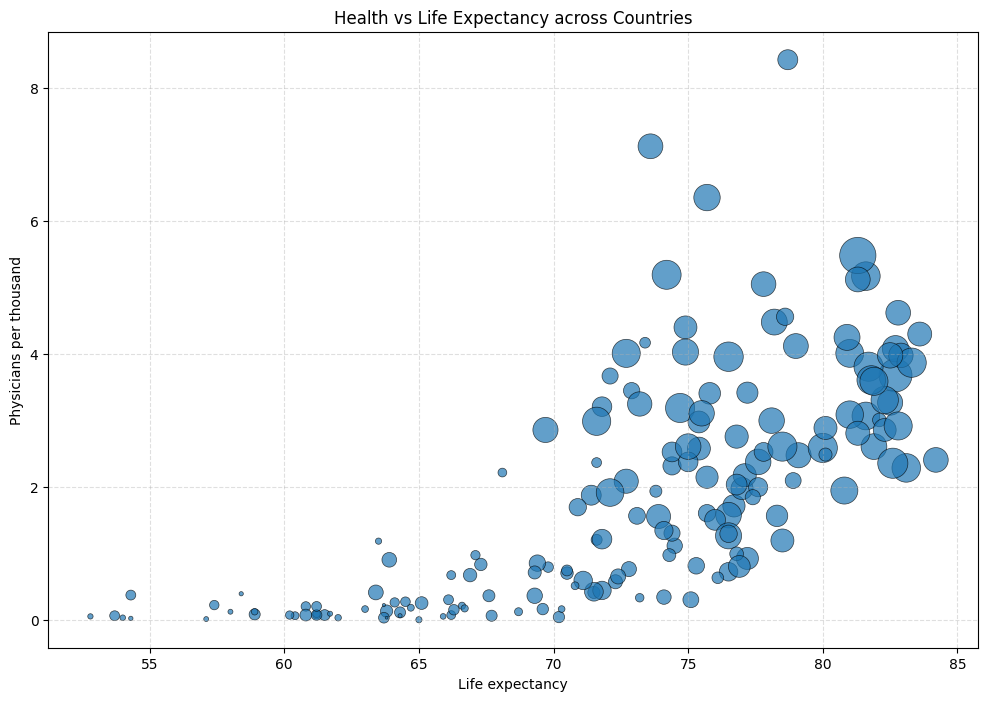

In [61]:
# Multivariate analysis between Gross tertiary education enrollment, Physicians per thousand and Life Expectancy
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    df['Life expectancy'],
    df['Physicians per thousand'],
    s=df['Gross tertiary education enrollment (%)']*5,
    alpha=0.7,
    edgecolors='k',
    linewidth=0.5
)
plt.xlabel('Life expectancy')
plt.ylabel('Physicians per thousand')
plt.title('Health vs Life Expectancy across Countries')
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

Nations with higher physician density consistently achieve greater life expectancy, emphasizing the crucial role of healthcare accessibility in improving overall well-being.

In [64]:
# 7 -- Cluster Exploration --
# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.select_dtypes(include=np.number))

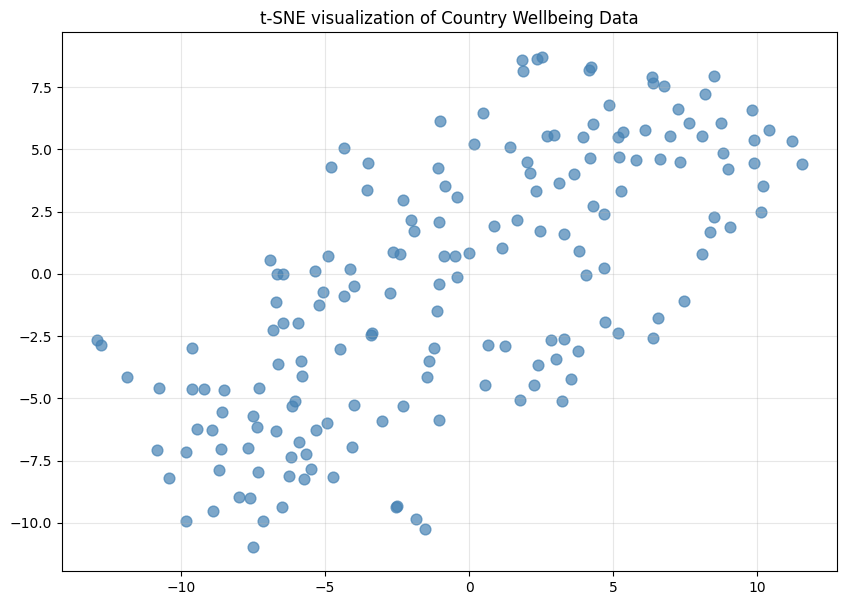

In [71]:
# t-SNE
tsne = TSNE(n_components=2, random_state=42, learning_rate=50, perplexity=30)
tsne_results = tsne.fit_transform(X_scaled)

plt.figure(figsize=(10,7))
plt.scatter(tsne_results[:,0], tsne_results[:,1], alpha=0.7, s=60, color='steelblue')
plt.title('t-SNE visualization of Country Wellbeing Data')
plt.grid(alpha=0.3)
plt.show()


The t-SNE projection does not reveal any clearly separable clusters, suggesting that the countries' wellbeing profiles are distributed more continuously rather than forming distinct groups.
This indicates that a non-linear structure might not strongly define natural clusters, motivating a hierarchical approach for deeper exploration.

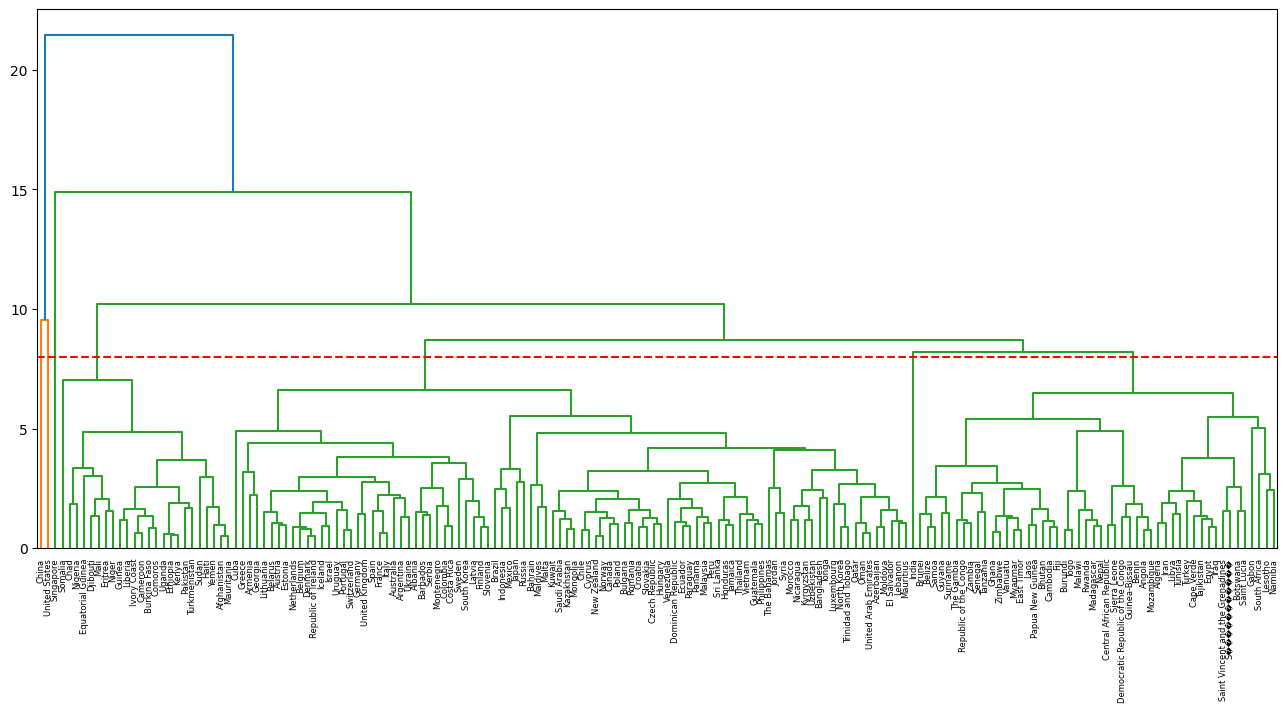

In [83]:
# Hierarchies
mergings = linkage(X_scaled, method='complete')
plt.figure(figsize=(16,7))
dendrogram(mergings, labels=df['Country'].values, leaf_rotation=90, leaf_font_size=6)
plt.axhline(y=8, color='r', linestyle='--')
plt.show()

The hierarchical clustering dendrogram reveals several meaningful groupings among countries.
Some countries merge at low distance levels, indicating strong similarities in their wellbeing indicators, while others join only at higher distances, reflecting more distinct socio-economic and health profiles.

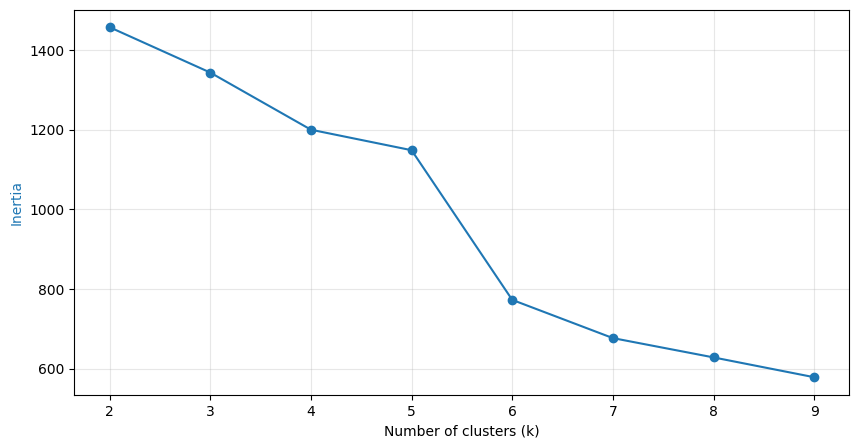

In [84]:
# Elbow method
inertia = []
K = range(2, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.plot(K, inertia, 'o-', label='Inertia (Elbow)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid(True, alpha=0.3)
plt.show()

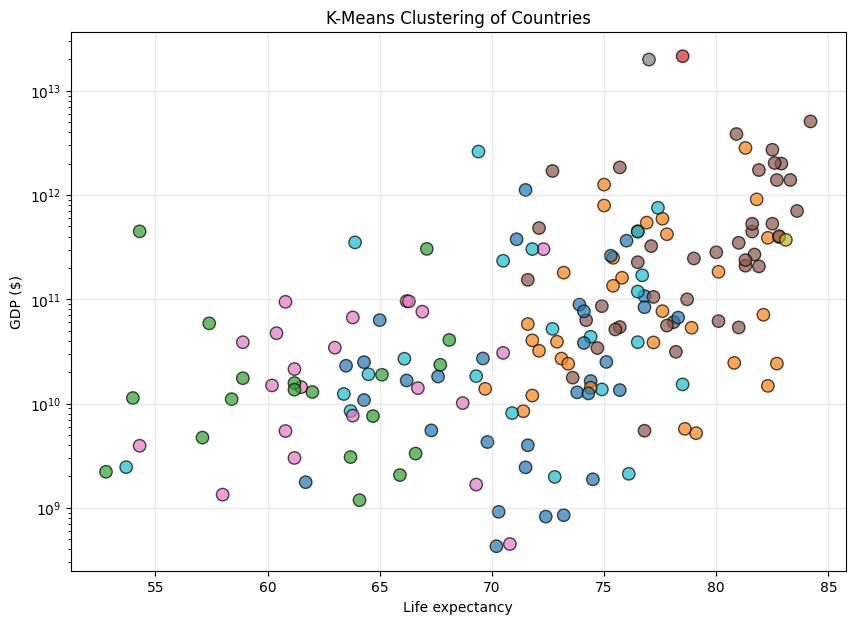

In [88]:
# K-Means
model = KMeans(n_clusters=6, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.predict(X_scaled)
plt.figure(figsize=(10,7))
plt.scatter(df['Life expectancy'], df['GDP ($)'],
            c=labels, cmap='tab10', s=80, alpha=0.7, edgecolor='k')
plt.title('K-Means Clustering of Countries')
plt.xlabel('Life expectancy')
plt.ylabel('GDP ($)')
plt.yscale('log')
plt.grid(alpha=0.3)
plt.show()